# Nelinearni valovi

__Nelinearni valovi__ su rješenje valne jednadžbe oblika 

\begin{align*}
&u_t+c(u)\, u_x=0, \quad x\in\mathbb{R}, \quad t>0,\quad c'(u)>0 \\
&u(x,0)=\phi(x), \quad x\in \mathbb{R},
\end{align*}

Karakteristične krivulje su definirane s

$$
\frac{dx(t)}{dt}=c(u).
$$

Zaista, uzduž svake krivulje koja zadovoljava (1), usmjerena derivacije je jednaka nuli  pa je rješenje konstantno:

$$
\frac{du(x(t),t)}{dt}=u_x\frac{dx(t)}{dt}+u_t\frac{dt}{dt}
=u_x\cdot c(u)+ u_t=0. \tag{1}
$$

Karakteristične krivulje su pravci: zbog (1) vrijedi

$$
\frac{d^2x(t)}{dt^2}=\frac{d}{dt} \bigg(\frac{dx(t)}{dt}\bigg)=
\frac{d}{dt}c(u(x(t),t))=c'(u)\frac{du(x(t),t)}{dt}=0
$$

pa je 

$$
x(t)=at+b.
$$

Nađimo rješenje: neka se točka $(x,t)\equiv(x(t),t)$ nalazi na karakteristici (pravcu) koji prolazi točkom $(\xi,0)$. Vrijednost rješenja je konstantna uzduž karakteristike pa je

$$
u(x,t)=\phi(\xi). \tag{2}
$$

Također, vrijedi

$$
\frac{dx(t)}{dt}=c(u(x,t))=c(u(\xi,0))=c(\phi(\xi))
$$

pa je

$$
x=x(t)=c(\phi(\xi))\,t+b.
$$

Uvrštavanje $x(0)=b=\xi$ daje

$$
x=x(t)=c(\phi(\xi))\,t+\xi.
$$

Ovo ie implicitna definicija za $\xi$ koja, zajedno s (2), daje rješenje:

$$
u(x,t)=\phi(\xi),\quad x=c(\phi(\xi))\,t+\xi.
$$

Ukoliko se viša točka kreće brže od niže točke, dolazi do __opuštanja vala__ (eng. _release wave_), ili do __lomljenja vala__ (eng. _shock wave_).

__Primjer:__ Riješimo problem

\begin{align*}
&u_t+u\,u_x=0,\quad x\in\mathbb{R},\quad t>0,\\
&u(x,0)=\begin{cases} 2,\quad x<0, \\
2-x,\quad x\in[0,1], \\
1,\quad x>1. \end{cases}
\end{align*}

In [1]:
using Gadfly
using Interact

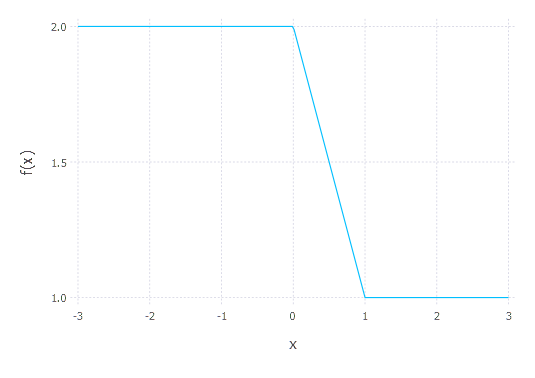

In [13]:
# Nacrtajmo početnu vrijednost
ϕ(x)=x<0?2:x>1?1:2-x
plot(ϕ,-3,3)

Karakteristike su 

\begin{align*}
x(t)&=2t+\xi,\quad \xi<0,\\
x(t)&=(2-\xi)\,t+\xi,\quad \xi\in [0,1],\\
x(t)&=t+\xi,\quad \xi > 1.
\end{align*}

Interact.Slider{Float64}(52: "input-16" = -1.0 Float64 , "", -1.0, -1.0:0.2:3.0, "horizontal", true, ".3f", true)

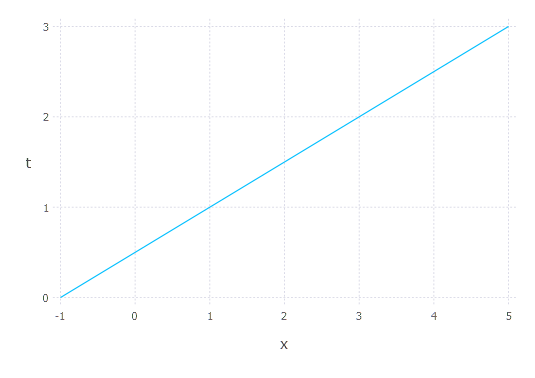

In [29]:
# Nacrtajmo karakteristike. Formule smo preradili tako da 
# je x nezavisna varijabla
@manipulate for ξ in slider(-1.0:0.2:3.0,value=-1.0)
    t(x)=ξ<0?(x-ξ)/2:ξ>1?x-ξ:(x-ξ)/(2-ξ)
    plot(t,-1,5,Coord.Cartesian(ymin=0.0,ymax=3.0),
        Guide.xlabel("x"),Guide.ylabel("t"))
end

Vidimo da rješenje nakon $t=1$ __ne postoji__ (val se prelomi). Na primjer, točka 
$(x,t)=(4,2)$ se nalazi na dvije različite karakteristike i to $x=2t$ (za $\xi=0$) i 
$x=t+2$ (za $\xi=2$). Uzduž prve karakteristike sve točke imaju vrijednost $u=\phi(0)=2$, a uzduž druge karakteristike sve točke imaju vrijednost $u=\phi(2)=1$. Stoga bi vrijednost $u(4,2)$ trebala imati dvije različite vrijednosti, što je nemoguće.

Izračunajmo rješenje. Za $\xi<0$ vrijedi

$$
x-2t=\xi< 0 \Rightarrow x<2t, \quad u(x,t)=\phi(\xi)=2.
$$

Za $\xi>1$ vrijedi

$$
x-t=\xi>1 \Rightarrow x>1+t, \quad u(x,t)=\phi(\xi)=1.
$$

Za $\xi\in[0,1]$ je $2t\leq x\leq t+1$ i 

$$
u(x,t)=\phi(\xi)=\frac{2-x}{1-t}.
$$

Zaista, iz 

$$
x=(2-\xi)\,t+\xi=2t-\xi t +\xi
$$

slijedi 

$$
\phi(\xi)=2-\xi=2-\frac{x-2t}{1-t}=\frac{2-x}{1-t}.
$$

Rješenje je

$$
u(x,t)=\begin{cases} 2,\quad x<2t,\\
\displaystyle\frac{2-x}{1-t},\quad 2t\leq x\leq t+1,\\
1,\quad x>t+1.
\end{cases}
$$



Interact.Slider{Float64}(60: "input-18" = 0.0 Float64 , "", 0.0, 0.0:0.1:1.5, "horizontal", true, ".3f", true)

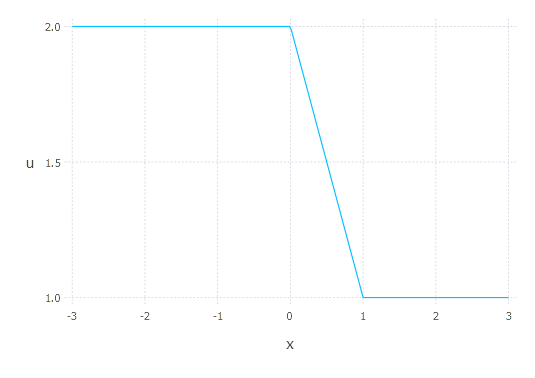

In [31]:
# Pogledajmo kako se val mijenja do trenutka t=1
@manipulate for t in slider(0.0:0.1:1.5,value=0.0)
    u(x)=x<2*t?2:x>t+1?1:(2-x)/(1-t)
    plot(u,-3,3,Guide.xlabel("x"),Guide.ylabel("u"))
end


In [41]:
using PyPlot

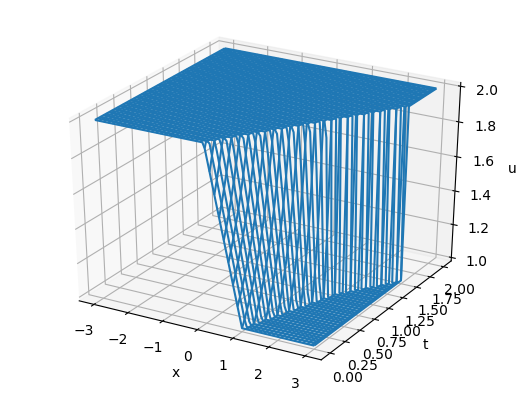

PyObject <matplotlib.text.Text object at 0x000000004A33D438>

In [45]:
# Cijelo rješenje
gridsize=100
x=linspace(-3,3,gridsize)
t=linspace(0,2,gridsize)
X=repmat(x,1,gridsize)
T=repmat(t',gridsize,1)
u(x,t)=x<2*t?2:x>t+1?1:(2-x)/(1-t)
U=[u(X[i,j],T[i,j]) for i=1:gridsize,j=1:gridsize]
mesh(X,T,U)
xlabel("x")
ylabel("t")
zlabel("u")